# KNN для классификации

In [232]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

## Генерация данных

In [351]:
X, y = make_classification(n_samples=50, # Количество строк
                           n_features=2, # Количество признаков
                           n_informative=2, # Количество информативных признаков
                           n_clusters_per_class=1, # Количество кластеров на класс,
                           n_classes=2, # Количество классов(При большом количество параметры точки четко не сгруппированы что усложняет задачу)
                           n_redundant=0, # Количество избыточных
                           random_state=10) #Состояние рандома

In [318]:
X.shape, y.shape

((50, 2), (50,))

In [319]:
# Разделение на обучаюзую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [320]:
X_train.shape, y_train.shape

((40, 2), (40,))

In [321]:
X_test.shape, y_test.shape

((10, 2), (10,))

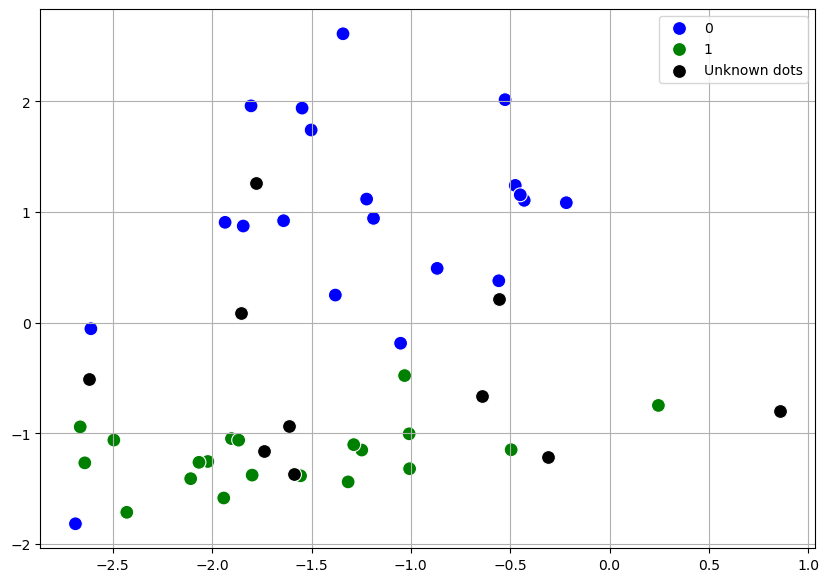

In [322]:
plt.figure(figsize=(10, 7))
plt.grid()
sns.scatterplot(x=X_train[:, 0], 
                y=X_train[:, 1], 
                hue=y_train, 
                palette=['blue', 'green'],
                markers='o',
                s=100)
sns.scatterplot(x=X_test[: , 0],
                y=X_test[: , 1],
                c='k',
                s=100, label='Unknown dots');

## Обучение

In [323]:
from sklearn.neighbors import KNeighborsClassifier

In [324]:
k = 3

model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Предсказание

In [325]:
pred = model.predict(X_test)
display(pred, y_test)

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0])

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

## Детали получения предсказания

In [326]:
test_dot = X_test[0]
test_dot

array([ 0.85794693, -0.80085316])

Предсказание:
1. Пройтись по всем обучающим объектам
2. Посчитать Евклидово расстояние между точкой которую хотим предиктить и всеми точками в тренировочной выборке
3. Из списка подсчитанных значений расстояния выброть k ближайших, то есть 3 первых значения в отсортированной по возрастанию выборке

Евклидово расстояние между двумя точками в двумерной плоскости $p$ и $q$: \
$d = \sqrt{(p_0-q_0)^2+(p_1 - p_1)^2}$\
Корень из гипотенузы / Теорема Пифагора

In [327]:
distances_list = []
for i, train_dot in enumerate(X_train):
    distances_list.append({'train_ind': i, 'distance': np.linalg.norm(train_dot - test_dot)})

distances = pd.DataFrame(distances_list)

In [328]:
distances.sort_values(by='distance').head(k)

,train_ind,distance
35,35,0.614267
13,13,1.397154
14,14,1.842276


In [329]:
nearest_neigbors_index = distances.sort_values(by='distance').head(k).index
nearest_neigbors_index

Index([35, 13, 14], dtype='int64')

In [330]:
X_train[nearest_neigbors_index]

array([[ 0.245953  , -0.74805754],
       [-0.49524829, -1.1485616 ],
       [-0.5574025 ,  0.37845464]])

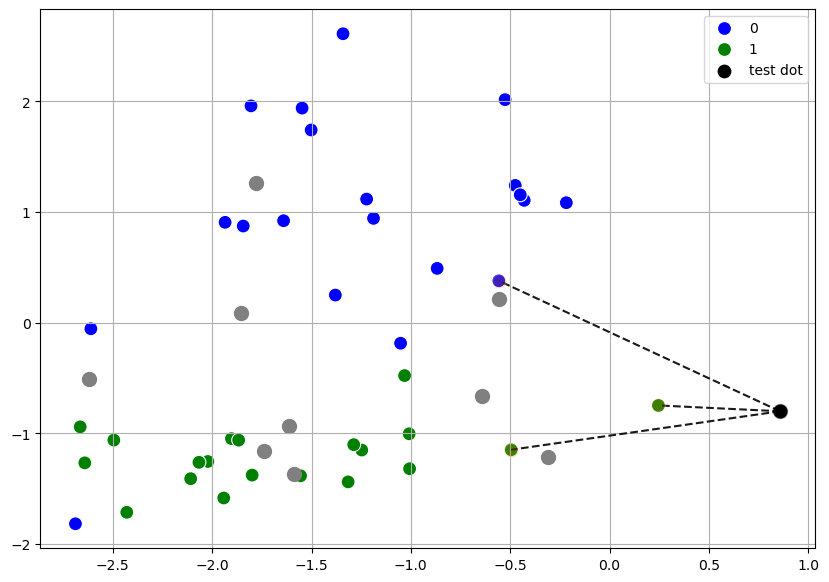

In [331]:
plt.figure(figsize=(10, 7))
plt.grid()
# Все точки
sns.scatterplot(x=X_train[:, 0],
               y=X_train[:, 1],
               s=100,
               zorder=1,
               hue=y_train,
               palette=['blue', 'green'])

# Соединяющие линии
for x, y in X_train[nearest_neigbors_index]:
    plt.plot([test_dot[0], x], [test_dot[1], y], 
             c='k', 
             linestyle='--', 
             alpha=0.9, 
             zorder=2)

# Соседи
sns.scatterplot(x=X_train[nearest_neigbors_index, 0],
               y=X_train[nearest_neigbors_index, 1],
               alpha=0.25,
               s=100,
                zorder=3)
# Тестовая точка
plt.scatter(test_dot[0], test_dot[1],
            s=80, 
            c='k', 
            zorder=4,
            label='test dot')
plt.scatter(X_test[:, 0], y=X_test[:, 1], c='gray', s=100)
plt.legend();

1. Выбирается количество соседей - $n$
2. Для каждой из неизвестных точек считается Евклидово расстояние до каждой известной точки
3. Выбирается $n$ точек чьи расстояния с неизвестной наименьшие (n самых близких точек)
4. Метка неизвестной точки определяется голосованием большинства меток n самых близких

# KNN для регрессии

In [366]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

import seaborn as sns

## Генерация данных

In [358]:
X, y = make_regression(n_samples=100, 
                       n_features=2, 
                       n_informative=2, 
                       random_state=10)

In [359]:
X.shape, y.shape

((100, 2), (100,))

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

In [362]:
X_train.shape, y_train.shape

((80, 2), (80,))

In [363]:
X_test.shape, y_test.shape

((20, 2), (20,))

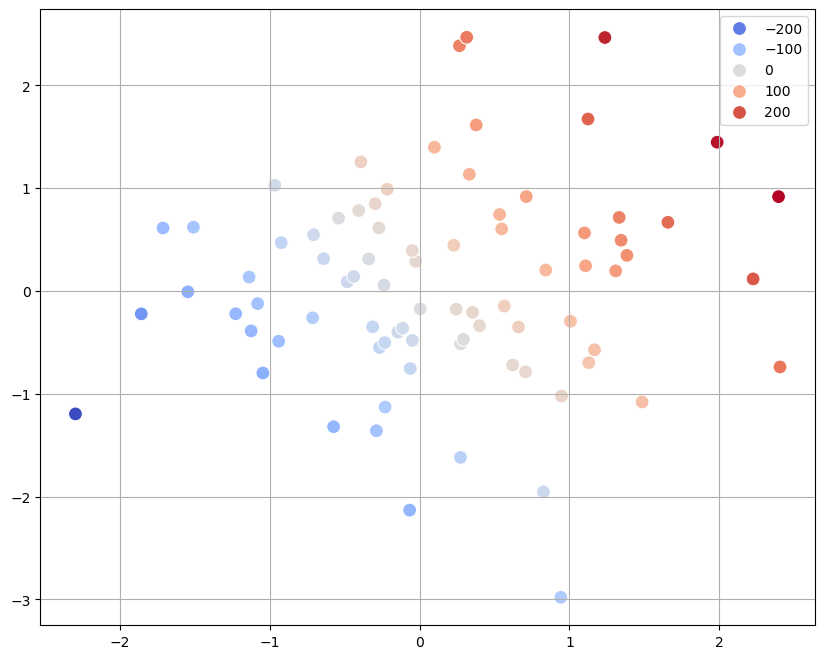

In [378]:
plt.figure(figsize=(10, 8))
plt.grid()
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, s=100, palette='coolwarm');

## Обучение

In [379]:
from sklearn.neighbors import KNeighborsRegressor

In [380]:
k = 3
model = KNeighborsRegressor(n_neighbors=k)
model

KNeighborsRegressor(n_neighbors=3)

In [382]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

## Предсказание

In [384]:
y_pred = model.predict(X_test)

In [408]:
y_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
y_df['diff'] = y_df['y_test']-y_df['y_pred']
y_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
y_test,-88.977182,114.749998,74.573001,-37.177689,101.315366,-14.414671,12.023337,28.267121,261.560729,99.845501,95.340492,-70.722850,51.776821,-260.861808,66.733260,-156.547600,65.431227,-92.727103,-35.335670,-79.403556
y_pred,-73.217212,121.064249,69.059165,-32.676499,94.102063,-11.692587,18.975434,24.361835,227.374376,98.975608,103.273812,-48.183260,69.059165,-169.630566,64.288221,-120.823152,69.059165,-93.921532,-36.756305,-92.579532
diff,-15.759970,-6.314251,5.513836,-4.501191,7.213303,-2.722084,-6.952097,3.905286,34.186353,0.869893,-7.933320,-22.539591,-17.282344,-91.231242,2.445039,-35.724448,-3.627937,1.194430,1.420635,13.175976


## Детали получения предсказания

In [412]:
# Тестовый объект
test_dot = X_test[0]
test_dot, y_test[0]

(array([ 0.21726515, -1.99439377]), -88.97718159497)

In [423]:
# Цикл ближайших соседий(наименьших расстояний)
distances_list = []
for i, train_dot in enumerate(X_train):
    distances_list.append({'index': i, 'distance': np.linalg.norm(train_dot - test_dot, ord=2)})
distances = pd.DataFrame(distances_list)

In [424]:
# k-Ближайших
distances.sort_values('distance').head(k)

,index,distance
15,15,0.314657
2,2,0.379941
25,25,0.611036


In [445]:
# Значения y в соответствии с индексами
y_train[[15, 2, 25]]

array([-120.27919126,  -64.04072235,  -35.33172098])

In [457]:
f'Предикт по циклу: {np.mean(y_train[[15, 2, 25]])} | Предикт модели: {y_pred[0]}'

'Предикт по циклу: -73.21721152716107 | Предикт модели: -73.21721152716107'

**Метрики**

In [399]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import root_mean_squared_error as rMSE

In [406]:
f'MSE: {MSE(y_df['y_test'], y_df['y_pred'])} | rMSE: {rMSE(y_df['y_test'], y_df['y_pred'])}'

'MSE: 614.8307265251547 | rMSE: 24.795780417747586'

1. Выбирается количество соседей - $n$
2. Для каждой из неизвестных точек считается Евклидово расстояние до каждой известной точки
3. Выбирается $n$ точек чьи расстояния с неизвестной наименьшие (n самых близких точек)
4. Значение неизвестной точки определяется как среднее значение значений n ближайших точек

# Взвешенная KNN для классификации

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

## Генерация данных

In [4]:
X, y  = make_moons(n_samples=50, random_state=6)

In [5]:
X.shape, y.shape

((50, 2), (50,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, test_size=0.2)

In [7]:
X_train.shape, y_train.shape

((40, 2), (40,))

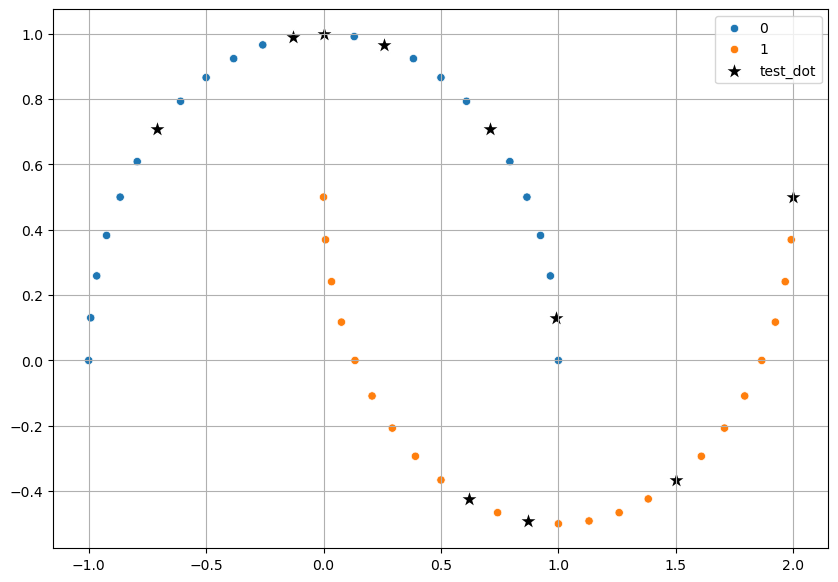

In [8]:
plt.figure(figsize=(10, 7))
plt.grid()
sns.scatterplot(x=X_train[:,0], y=X_train[:, 1], hue=y_train)
sns.scatterplot(x=X_test[:,0], y=X_test[:, 1], marker='*', s=200, c='k', label='test_dot');

## Стандартная модель

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
k = 20
model = KNeighborsClassifier(k)
model

KNeighborsClassifier(n_neighbors=20)

In [11]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [12]:
y_pred = model.predict(X_test)
display(y_test, y_pred)

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [42]:
# Тестовая точка на которой модель ошиблась
test_dot = X_test[1]
test_dot = test_dot.reshape(1, 2)
test_dot

array([[0.99144486, 0.13052619]])

In [44]:
# Результат модели - 1, а должна быть 0
model.predict(test_dot)

array([1], dtype=int64)

In [82]:
distances_list = []
for i, train_dot in enumerate(X_train):
    distances_list.append({'train_ind': i, 'distance': np.linalg.norm(train_dot - test_dot), 'y_train':y_train[i]})

distances = pd.DataFrame(distances_list)

In [83]:
nearest_neigbors_index = distances.sort_values(by='distance').head(k).index
nearest_neigbors_index

Index([18, 17, 28, 37, 19, 27, 22, 8, 14, 30, 24, 5, 33, 25, 38, 32, 9, 31, 10,
       6],
      dtype='int64')

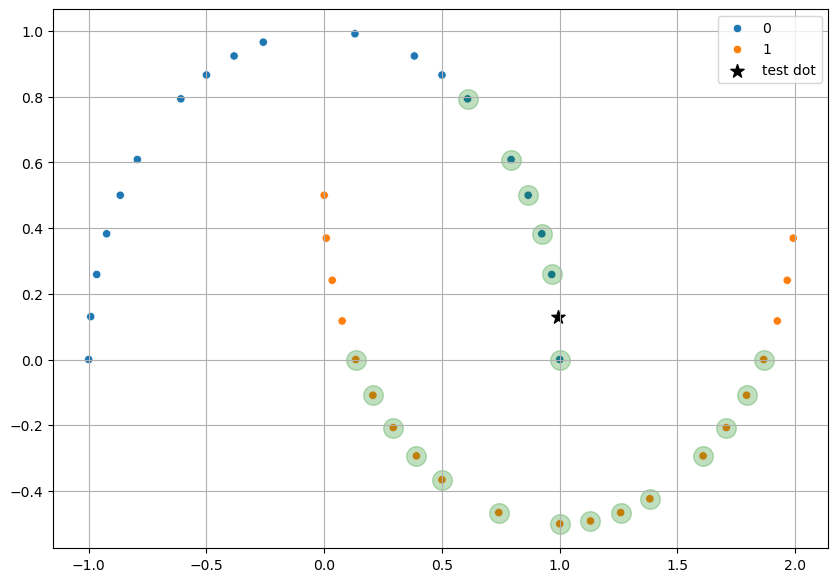

In [84]:
plt.figure(figsize=(10, 7))
plt.grid()

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)

# Тестовая точка
plt.scatter(x=test_dot[0, 0], y=test_dot[0,1], c='k', marker='*', s=100, label='test dot')

# Точки повлиявшие на предсказание
plt.scatter(x=X_train[nearest_neigbors_index, 0], y=X_train[nearest_neigbors_index, 1], s=200, c='g', alpha=0.25)
plt.legend();

## Взвешенная модель

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
model = KNeighborsClassifier(weights='distance')
model

KNeighborsClassifier(weights='distance')

In [87]:
model.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [88]:
y_pred = model.predict(X_test)

In [89]:
display(y_test, y_pred)

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

## Детали получения предсказания

In [90]:
distances = distances.sort_values(by='distance').head(k)

Вес вычисляется как
$$
w = \frac{1}{distance+a}
$$

In [91]:
distances['weights'] = 1/distances['distance']

In [108]:
print(' Вес для класса 0: ', distances[distances['y_train'] == 0]['weights'].sum(), 
      '\n Вес для класса 1: ', distances[distances['y_train'] == 1]['weights'].sum())

 Вес для класса 0:  24.921767151644726 
 Вес для класса 1:  19.082417851627184


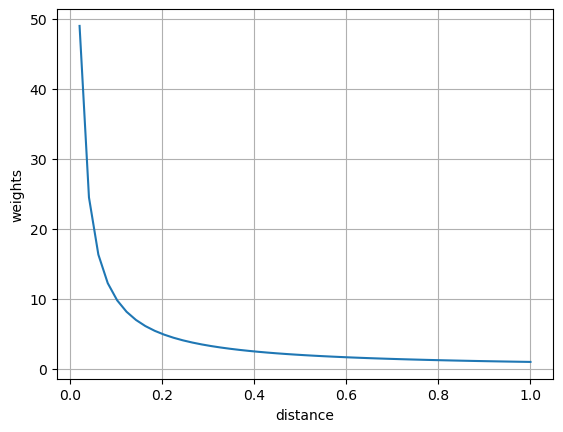

In [78]:
import warnings
warnings.filterwarnings('ignore')

x = np.linspace(0, 1, 50)

plt.grid()
plt.plot(x, 1/(x))
plt.xlabel('distance')
plt.ylabel('weights');

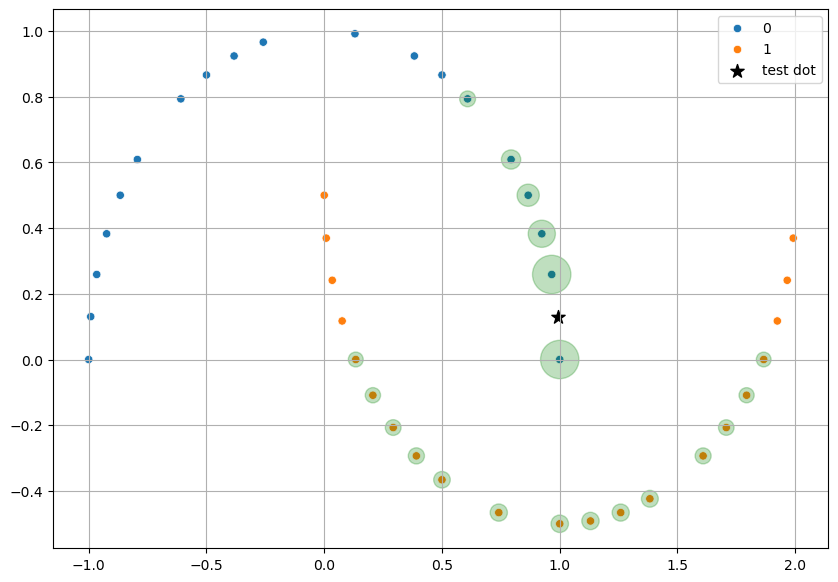

In [111]:
plt.figure(figsize=(10, 7))
plt.grid()

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)

# Тестовая точка
plt.scatter(x=test_dot[0, 0], y=test_dot[0,1], c='k', marker='*', s=100, label='test dot')

# Точки повлиявшие на предсказание
plt.scatter(x=X_train[nearest_neigbors_index, 0], y=X_train[nearest_neigbors_index, 1], s=distances['weights']*100, c='g', alpha=0.25)
plt.legend();

## Resume

1. Для точки считается расстояние до всех точек с обучения
2. Полученные расстояния сортируются от самого ближнего до самого дальнего
3. Выбираются K первых(ближайших) дистанций
4. Считаются веса для K-ближайших точек
5. Веса суммируются поклассово, класс с наибольшей суммой и назначается точке

# Взвешенная KNN для регрессии

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [118]:
X, y = make_regression(n_samples=50, n_features=1, n_informative=1, random_state=10, noise=20)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [126]:
X_train.shape, y_train.shape

((40, 1), (40,))

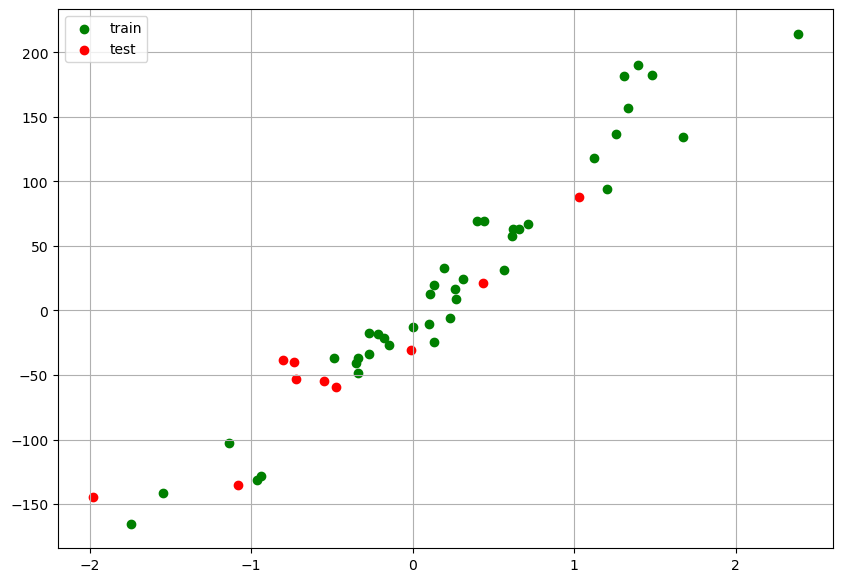

In [131]:
plt.figure(figsize=(10, 7))
plt.grid()

plt.scatter(X_train, y_train, c='g', label='train')
plt.scatter(X_test, y_test, c='r', label='test')

plt.legend();

In [122]:
from sklearn.neighbors import KNeighborsRegressor

## Стандартная модель

In [123]:
k=10

model = KNeighborsRegressor(n_neighbors=k)
model

KNeighborsRegressor(n_neighbors=10)

In [132]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [135]:
y_pred = model.predict(X_test)
display(y_pred, y_test)

array([-59.55707032, 112.89146084, -86.60459276, -59.55707032,
       -86.60459276, -59.55707032, -40.95328108, -40.95328108,
        39.67279396,  -5.36779879])

array([ -52.74921133,   87.85082066, -134.90564126,  -38.46030749,
       -144.85938154,  -39.94101003,  -54.34102676,  -59.17951554,
         21.40103835,  -30.32750798])

In [159]:
from sklearn.metrics import r2_score

In [160]:
r2_score(y_test, y_pred)

0.7865141971180671

**Тестовая точка**

In [149]:
test_dot = X_test[1]
test_dot = test_dot.reshape(-1, 1)
test_dot

array([[1.02827408]])

In [151]:
display(model.predict(test_dot), y_test[1])

array([112.89146084])

87.85082065860337

## Взвешенная модель

In [161]:
k=10

model = KNeighborsRegressor(n_neighbors=k, weights='distance')
model

KNeighborsRegressor(n_neighbors=10, weights='distance')

In [162]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10, weights='distance')

In [165]:
y_pred = model.predict(X_test)

In [166]:
r2_score(y_test, y_pred)

0.8117031172582724